<a href="https://colab.research.google.com/github/Cyrill98/Python-Image-Processing/blob/main/ImproveAccuracy(Fashion_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Improve Computer Vision accuracy with convolutions**

---
In Image Processing,  you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can perform operations like edge detection. For example, typically a 3x3 is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has its edges enhanced.

This is perfect for computer vision, because enhancing features like edges helps the computer distinguish one item from another. Better still, the amount of information needed is much less, because you'll train only on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers becomes more focused and possibly more accurate.


In this exercise, we'll be improving the accuracy of our previous Fashion MNIST datasets by applying convolution neural network


In [11]:
import tensorflow as tf
print (tf.__version__)

2.5.0


In [12]:
mnist = tf.keras.datasets.fashion_mnist

In [13]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

There's a change here and the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, you have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do that, then you'll get an error when training because the convolutions do not recognize the shape.

In [14]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0

Next, define your model. Instead of the input layer at the top, you're going to add a convolutional layer. The parameters are:

The number of convolutions you want to generate. A value like 32 is a good starting point.
The size of the convolutional matrix, in this case a 3x3 grid.
The activation function to use, in this case use relu.
In the first layer, the shape of the input data.

---

You'll follow the convolution with a max pooling layer, which is designed to compress the image while maintaining the content of the features that were highlighted by the convolution. By specifying (2,2) for the max pooling, the effect is to reduce the size of the image by a factor of 4. It creates a 2x2 array of pixels and picks the largest pixel value, turning 4 pixels into 1. It repeats this computation across the image, and in so doing halves the number of horizontal pixels and halves the number of vertical pixels.

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

You can call model.summary() to see the size and shape of the network. Notice that after every max pooling layer, the image size is reduced in the following way:

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [17]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.4471 - accuracy: 0.8371
Epoch 2/5
1875/1875 [==============================] - 91s 48ms/step - loss: 0.2979 - accuracy: 0.8920
Epoch 3/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.2500 - accuracy: 0.9081
Epoch 4/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2187 - accuracy: 0.9185
Epoch 5/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.1922 - accuracy: 0.9276


In [18]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.2575 - accuracy: 0.9055


In [19]:
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Test loss: 0.257515549659729, Test accuracy: 90.54999947547913


Gain a significant improvement by gaining 93% on the training data and 91% on the validation data.

---
Now try running it for more epochs—say about 20—and explore the results. While the training results might seem really good, the validation results may actually go down due to a phenomenon called overfitting.


Overfitting occurs when the network learns the data from the training set too well, so it's specialised to recognize only that data, and as a result is less effective at seeing other data in more general situations. For example, if you trained only on heels, then the network might be very good at identifying heels, but sneakers might confuse it.

# **Visualizes the Convolutions and Pooling**

The print (test_labels[:100]) shows the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Take a look at the result of running the convolution on each and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less information, and it's perhaps finding a commonality between shoes based on that convolution and pooling combination.

In [20]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


Now you can select some of the corresponding images for those labels and render what they look like going through the convolutions. So, in the following code, FIRST_IMAGE, SECOND_IMAGE and THIRD_IMAGE are all the indexes for value 9, an ankle boot.

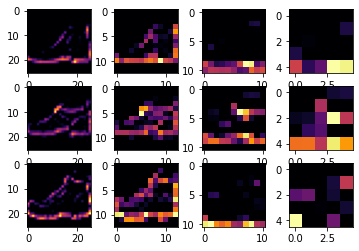

In [21]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

**Exercise 1**

Try editing the convolutions. Change the number of convolutions from 32 to either 16 or 64. What impact does that have on accuracy and training time?

**Exercise 2**

Remove the final convolution. What impact does that have on accuracy or training time?

**Exercise 3**

Add more convolutions. What impact does that have?

**Exercise 4**

Remove all convolutions but the first. What impact does that have? Experiment with it.